# 0. READ QUESTIONS

1. First you must read dataframe info.
2. You must study the situation
3. You must selec your strategy

# 1. IMPORT LIBRERIES

In [1]:
#import libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. IMPORT DATAFRAME

In [2]:
# Import Dataset 

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3.EXPLORE DATAFRAME

## 3.1 Info

In [3]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Identificar el tipo de datos de cada columna
data_types = df.dtypes
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: []
Numeric_columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## 3.2 shape

In [5]:
#shape
df.shape

(768, 9)

## 3.3 Nul Dataframe

In [6]:
df.isna().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### FIRST CHECK POINT / WRITE CONCLUSIONS

### Conclusions
* No nulls
* 9 numeric variables and Colums
* 768 entries

##### CATEGORIC VARIABLES:
* 0 

##### NUMERIC VARIABLES:
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* IBM
* DiabetesPedigreeFunction
* Age
* Outcome

# 4. UNIVARIATE DATA ANALYSIS

## 4.1 Univariate Categorical Data Analysis

### SECOND CHECK POINT / WRITE CONCLUSIONS

### Conclusions
* No exist categoric variables

## 4.2 Univariate Numeric Data Analysis

In [7]:
def graficos_eda_numericos(cat):
    # Filtrar las columnas numéricas
    cat_numericas = cat.select_dtypes(include='number')

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 2  # Histograma y Boxplot

    # Definimos el gráfico con el número adecuado de subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, num_filas * 6))

    # Aplanamos los ejes para iterar a través de ellos como si fueran un arreglo unidimensional
    ax = ax.flat

    # Creamos un bucle que añade histogramas y boxplots para cada variable numérica
    for cada, variable in enumerate(cat_numericas):
        # Histograma
        sns.histplot(cat_numericas[variable], ax=ax[cada*num_columnas], bins=20, kde=True)
        ax[cada*num_columnas].set_title(f'Histograma: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Boxplot
        sns.boxplot(x=cat_numericas[variable], ax=ax[cada*num_columnas+1], orient='h')
        ax[cada*num_columnas+1].set_title(f'Boxplot: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

    # Ajustamos el espacio entre los subplots para una mejor visualización
    plt.tight_layout()

   

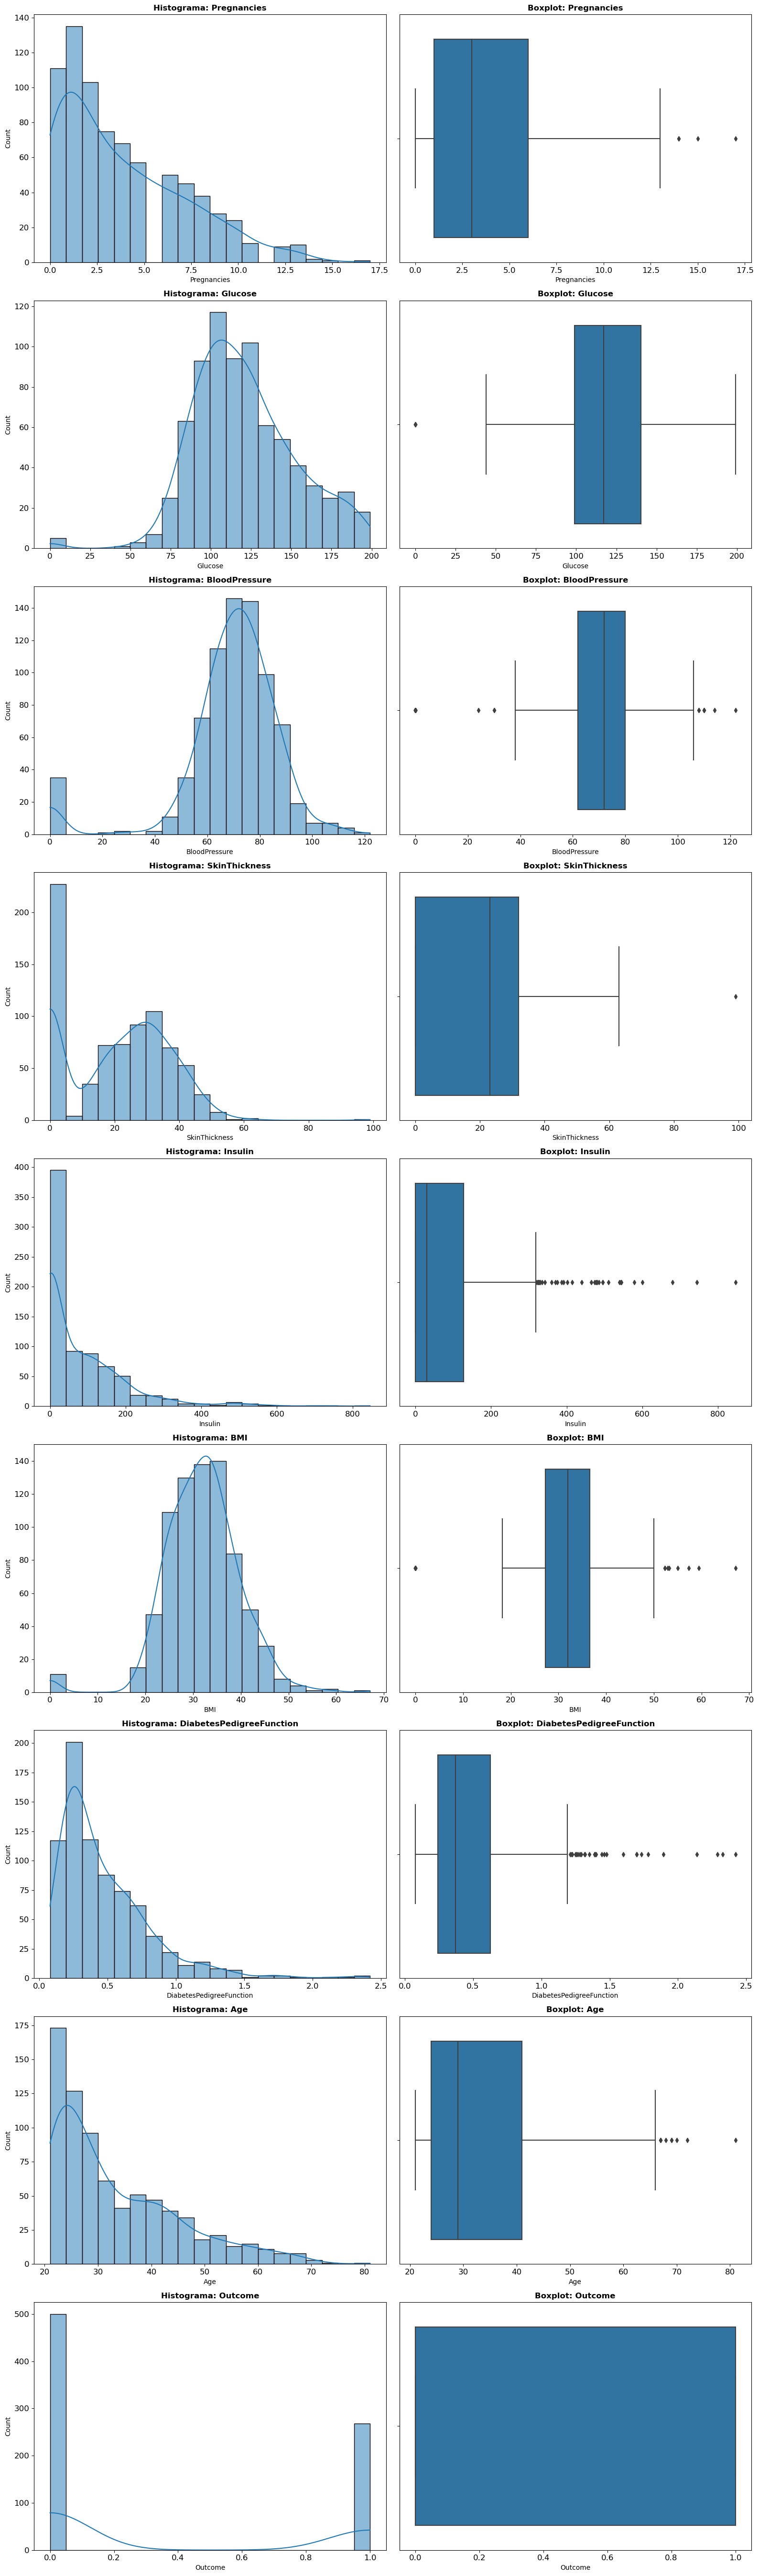

In [8]:
graficos_eda_numericos(df)

### THIRD CHECK POINT / WRITE CONCLUSIONS

##### GRAPHED NUMERICAL VARIABLES:

* We can see outliers. This outliers are obligatory delete because some are imposibles.
* For example: IBM 0 or Glucose 0.




# 5. MULTIVARIATE VARIABLES ANALYSIS

## 5.1 Numerical-numerical analysis

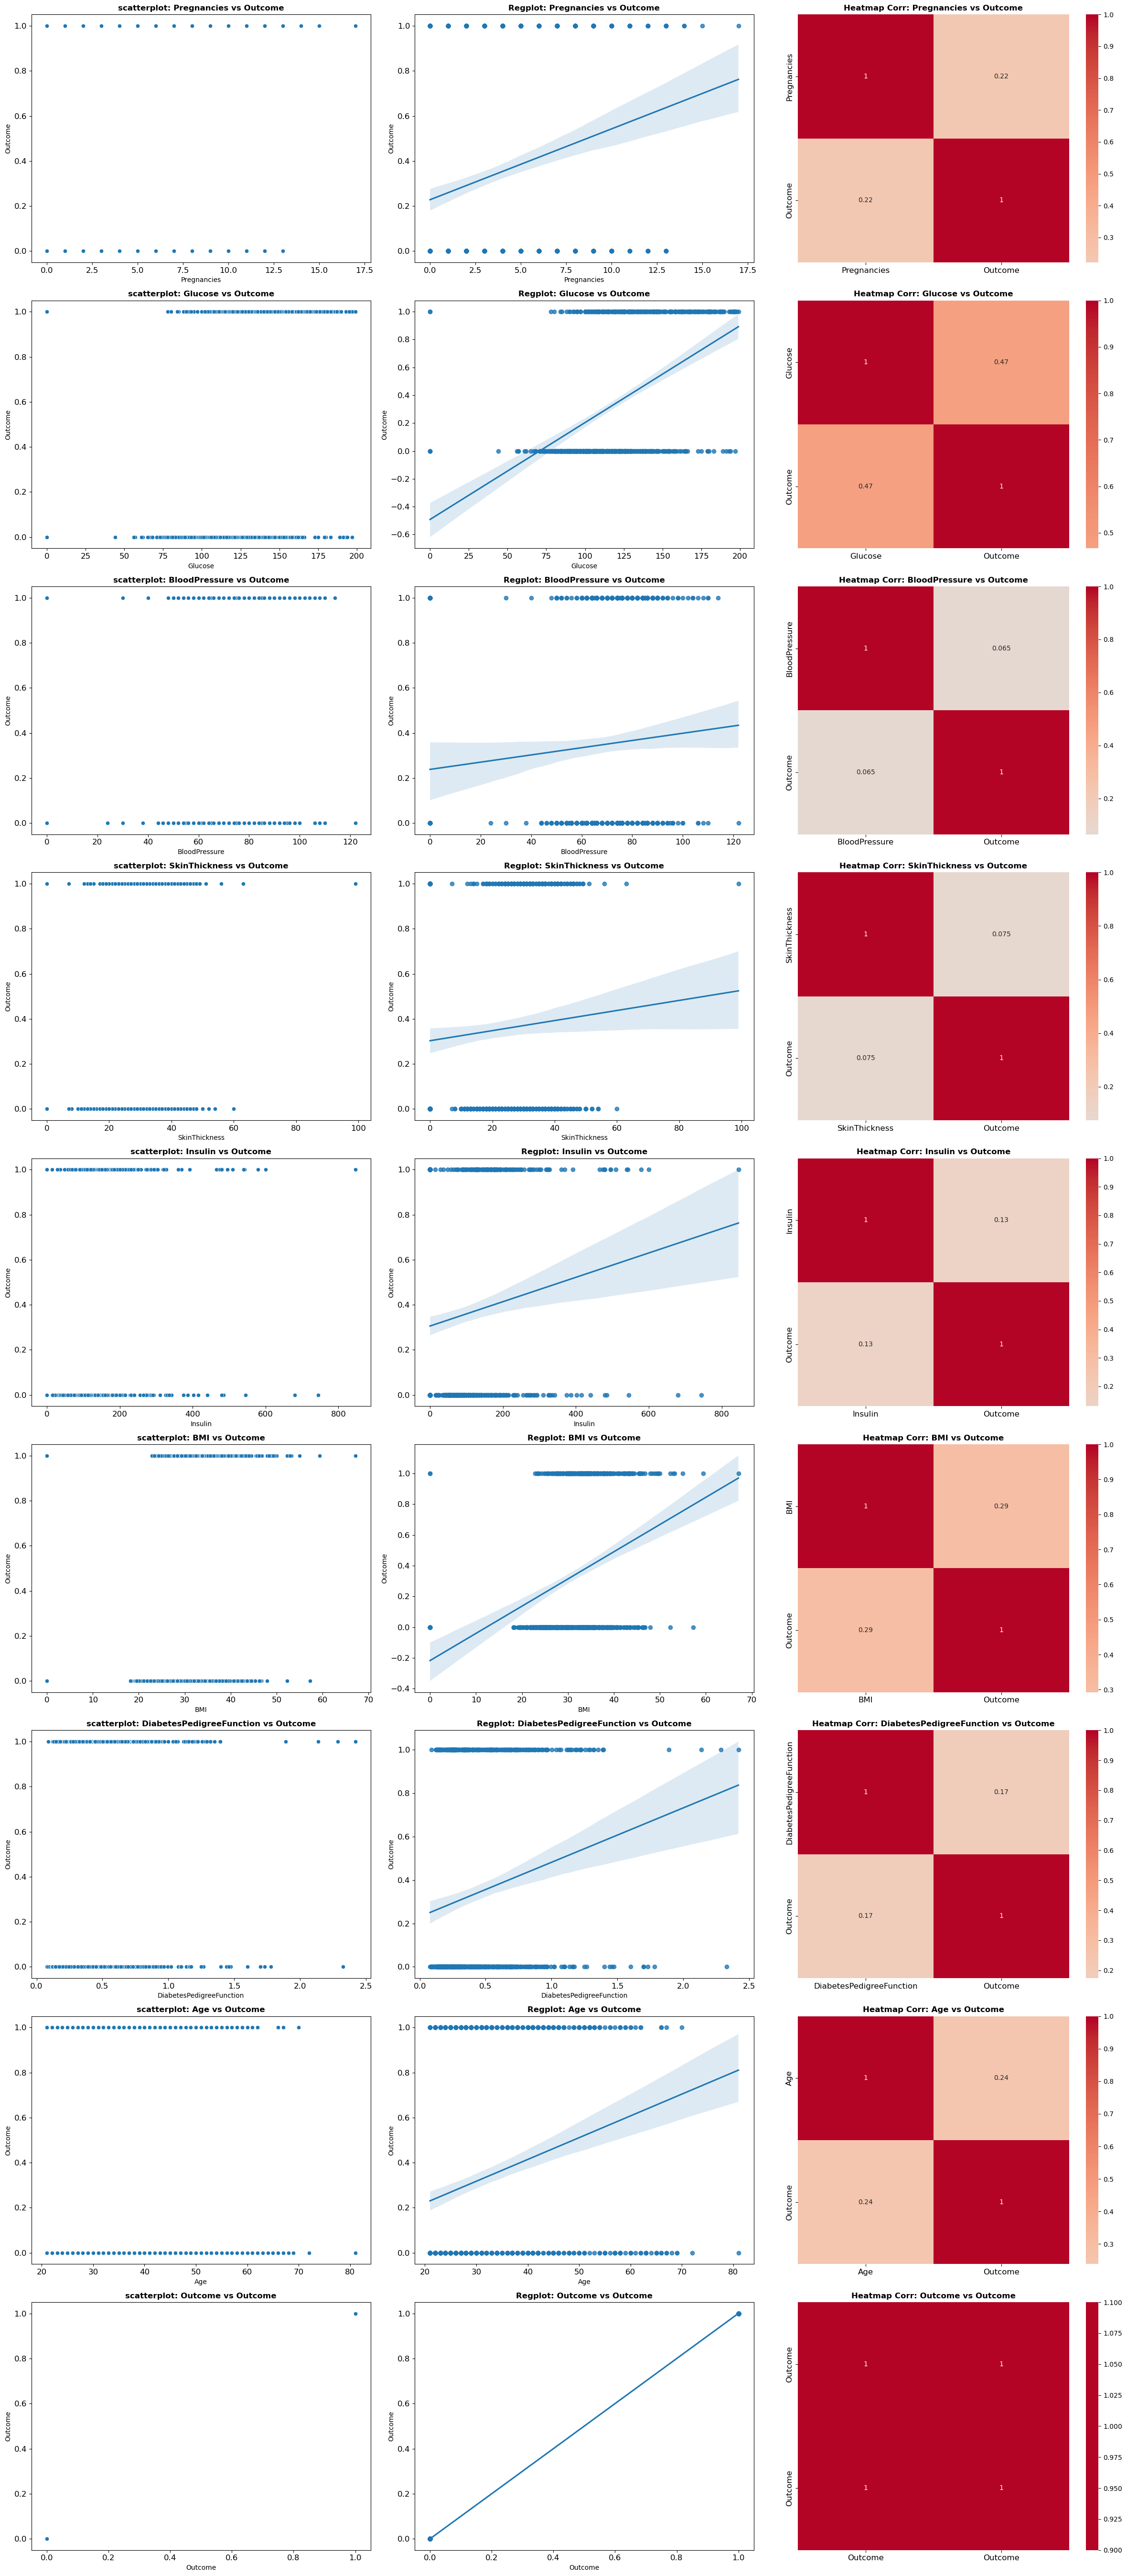

In [9]:
def comparar_numericas_con_target(cat, target):
    # Filter numerical columns
    cat_numericas = cat.select_dtypes(include='number')

    # Calculate the number of rows and columns required for the subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 3

    # We define the chart with the appropriate number of subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(24, num_filas * 6))

    # We flatten the axes to iterate through them as if they were a one-dimensional array.
    ax = ax.flat

    # We create a loop that adds scatter plots, regplot and heatmap for each numeric variable with the target
    for cada, variable in enumerate(cat_numericas):
        # Scatter plot
        sns.scatterplot(x=cat_numericas[variable], y=target, data=cat, ax=ax[cada*num_columnas])
        ax[cada*num_columnas].set_title(f'scatterplot: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Regplot graph
        sns.regplot(x=cat_numericas[variable], y=target, data=cat, ax=ax[cada*num_columnas+1])
        ax[cada*num_columnas+1].set_title(f'Regplot: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

        # Heatmap de correlación
        corr_matrix = cat[[variable, target]].corr()
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, ax=ax[cada*num_columnas+2])
        ax[cada*num_columnas+2].set_title(f'Heatmap Corr: {variable} vs {target}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+2].tick_params(labelsize=12)

    # We adjust the spacing between the subplots for better visualization.
    plt.tight_layout()


# Push target
comparar_numericas_con_target(df, "Outcome")

##### NUMERICAL VARIABLES GRAPHED MULTIVARIABLE:

* Exist lineal regresión between all variables with Outcome (except Bloodpleasue, because the lineal regressión y very slight)


## 5.3 MULTIVARIABLE


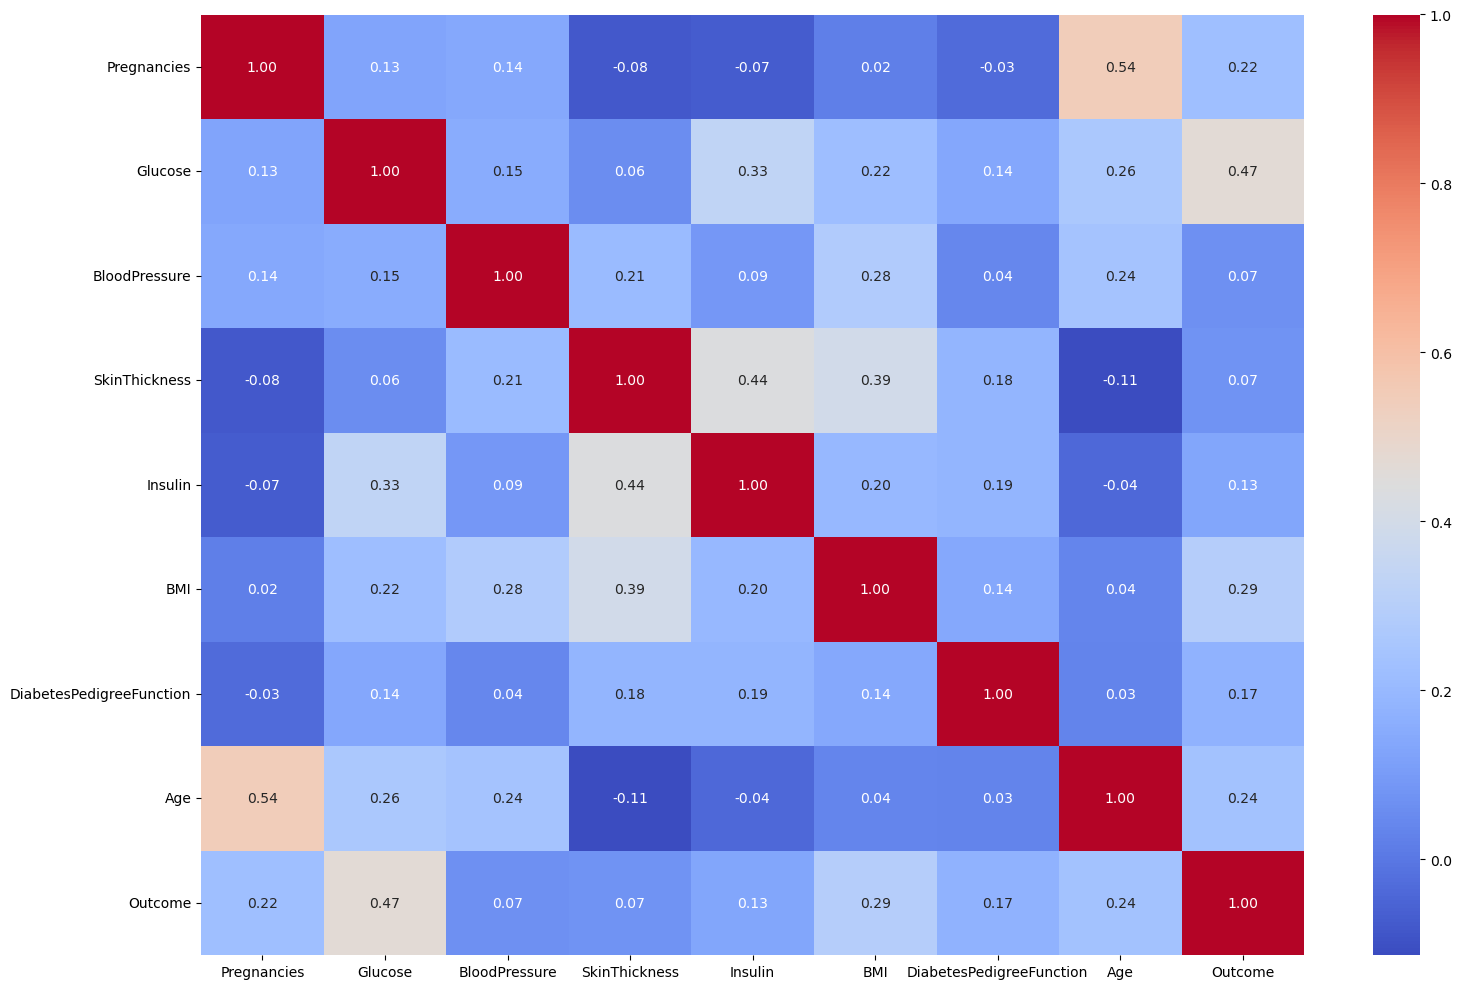

In [10]:
# Heatmap of Dataset

# Draw Figure
fig, axis = plt.subplots(figsize=(16, 10))

# Plot Heatmap

sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap='coolwarm')

# Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

# 6. TOTAL COMPARATION

### FIFTH CHECK POINT / WRITE CONCLUSIONS

* We can see many relationship between variables. 
* But We must highlight: Outcome with:  Glucose, BM, Age and Pregnancies.

* Is curious how Age and pregnancies is relationship (is normal because the womens have a period for to be pregnant)

# OPTIONAL: SEE COMPARATION WITH LINE REGRETION

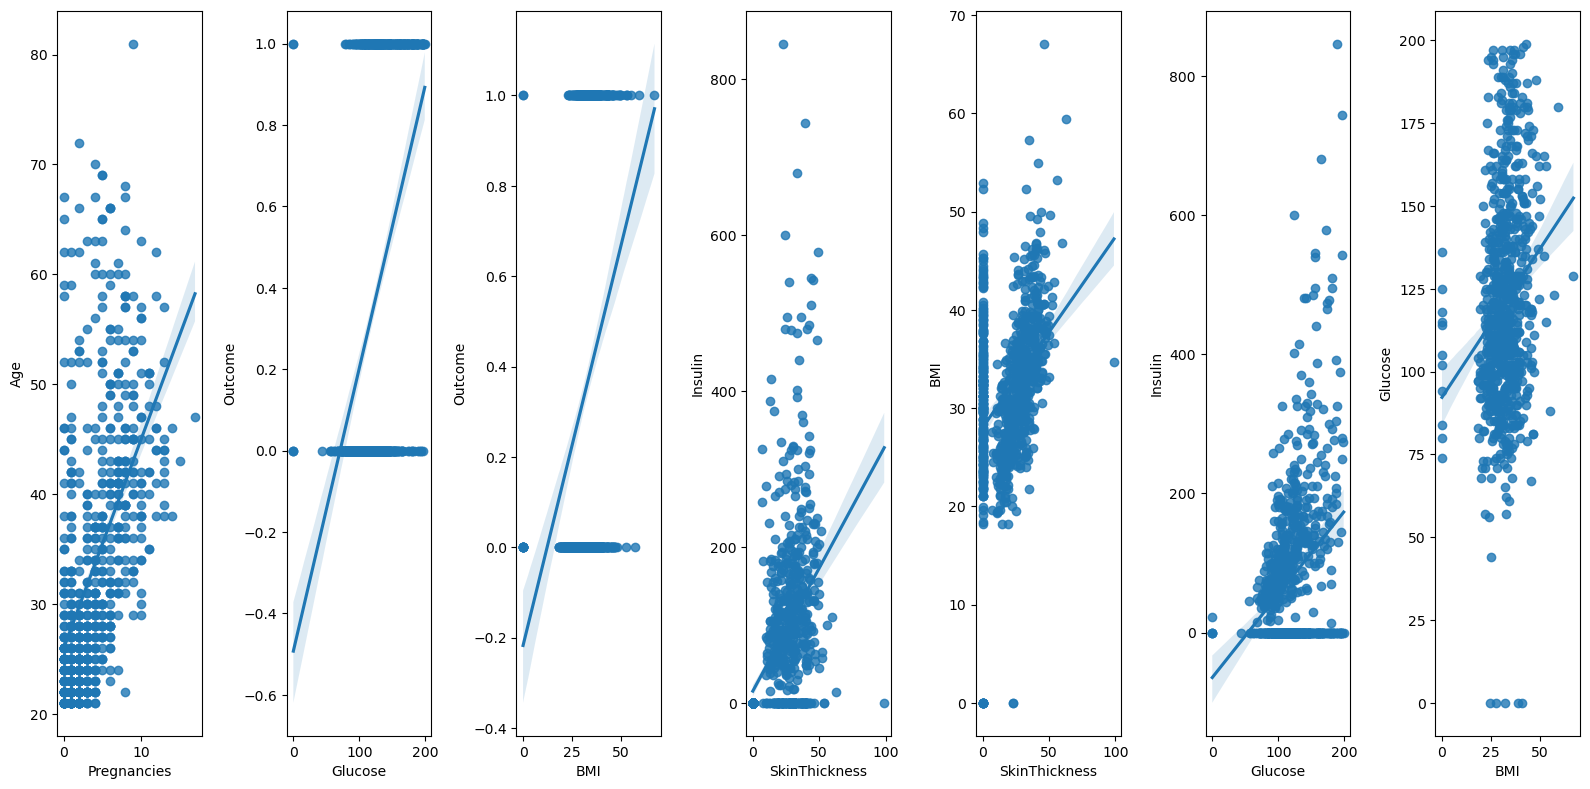

In [11]:
# Regplot the strong relationship Features (estos son cuadros de regresión lineal)

fig, axis = plt.subplots(figsize = (16, 8), ncols = 7)

# Plot the Data (WE USE REGPLOT FOR THIS METODH IS GOOD FOR LIEAL REGRESION)

sns.regplot(ax=axis[0], data=df, x='Pregnancies', y='Age')
sns.regplot(ax=axis[1], data=df, x='Glucose', y='Outcome')
sns.regplot(ax=axis[2], data=df, x='BMI', y='Outcome')
sns.regplot(ax=axis[3], data=df, x='SkinThickness', y='Insulin')
sns.regplot(ax=axis[4], data=df, x='SkinThickness', y='BMI')
sns.regplot(ax=axis[5], data=df, x='Glucose', y='Insulin')
sns.regplot(ax=axis[6], data=df, x='BMI', y='Glucose')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

# 7. FEATURE ENGINEERING

## 7.1 OUTLIER ANALISYS

In [12]:
# Describe of Features

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### NINTH CHECK POINT / WRITE CONCLUSIONS

* We can see min 0.000 in many variables (This is imposible)

* 0 in some variables is similar a dead person (BloodPressure for example)

* We need delete this outliers.

## 7.2 OUTLIER ANALISYS: SEE IQR FOR DELETE OUTLIERS

### We use this metodh for all variables that we think that have outliers

In [13]:
def calcular_estadisticas(df, columnas_numericas):
    # Filter numerical columns
    cat_numericas = df[columnas_numericas]

    # Calculate the 75th percentile (Q3) and 25th percentile (Q1)
    q3 = cat_numericas.quantile(0.75)
    q1 = cat_numericas.quantile(0.25)

    # Calculate the IQR
    iqr = q3 - q1

    # Calculate the minimum and maximum
    minimo = cat_numericas.min()
    maximo = cat_numericas.max()

    # Calculate upper limit and lower limit to identify outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Create a DataFrame with the results
    resultados = pd.DataFrame({ 'Lower Limit': lower_limit,'Upper Limit': upper_limit,'IQR': iqr,
                                'Mínimo': minimo, 'Q1: 0,25': q1, 'Mediana: 0,50': cat_numericas.median(),
                               'Q3: 0,75': q3, 'Máximo: 100': maximo,})

    return resultados

# Example of use
# Add the numeric variables to the DataFrame
# Replace 'var1', 'var2', 'var3', etc. with the names of your numeric variables
df['Pregnancies']
df['Glucose'] 
df['BloodPressure'] 
df['SkinThickness']
df['Insulin'] 
df['BMI'] 
df['DiabetesPedigreeFunction']
df['Age'] 
df['Outcome'] 

# Calculate the statistics of the numerical variables
columnas_numericas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
estadisticas_resultado = calcular_estadisticas(df, columnas_numericas)

print("Estadísticas de las variables numéricas:")
print(estadisticas_resultado)

Estadísticas de las variables numéricas:
                          Lower Limit  Upper Limit       IQR  Mínimo  \
Pregnancies                    -6.500       13.500    5.0000   0.000   
Glucose                        37.125      202.125   41.2500   0.000   
BloodPressure                  35.000      107.000   18.0000   0.000   
SkinThickness                 -48.000       80.000   32.0000   0.000   
Insulin                      -190.875      318.125  127.2500   0.000   
BMI                            13.350       50.550    9.3000   0.000   
DiabetesPedigreeFunction       -0.330        1.200    0.3825   0.078   
Age                            -1.500       66.500   17.0000  21.000   
Outcome                        -1.500        2.500    1.0000   0.000   

                          Q1: 0,25  Mediana: 0,50   Q3: 0,75  Máximo: 100  
Pregnancies                1.00000         3.0000    6.00000        17.00  
Glucose                   99.00000       117.0000  140.25000       199.00  
BloodPress

In [14]:
# Calculate the interquartile range (IQR) for each numerical colu
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# We define a threshold to consider outliers
umbral = 1.5

# Filter the DataFrame to remove outliers in each numeric column
df = df[~((df < (Q1 - umbral * IQR)) | (df > (Q3 + umbral * IQR))).any(axis=1)]

* Whit this code, we can delete outliers in range 1.5 interquartile range
* This metohd is good because in this range we delete extreme outliers but we maintain utils outliers 
* We are analizating healt date, although is probably have extreme dates, those only break reality.
* That one person with 90 years can have diabetes this information afect to the model, because is extreme and low probability

In [15]:
def graficos_eda_numericos(cat):
    # Filter numerical columns
    cat_numericas = cat.select_dtypes(include='number')

    # Calculate the number of rows and columns required for the subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 2  # Histograma y Boxplot

    # We define the chart with the appropriate number of subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, num_filas * 6))

    # We flatten the axes to iterate through them as if they were a one-dimensional array.
    ax = ax.flat

    # We create a loop that adds histograms and boxplots for each numeric variable
    for cada, variable in enumerate(cat_numericas):
        # Histogram
        sns.histplot(cat_numericas[variable], ax=ax[cada*num_columnas], bins=20, kde=True)
        ax[cada*num_columnas].set_title(f'Histograma: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Boxplot
        sns.boxplot(x=cat_numericas[variable], ax=ax[cada*num_columnas+1], orient='h')
        ax[cada*num_columnas+1].set_title(f'Boxplot: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

    plt.tight_layout()

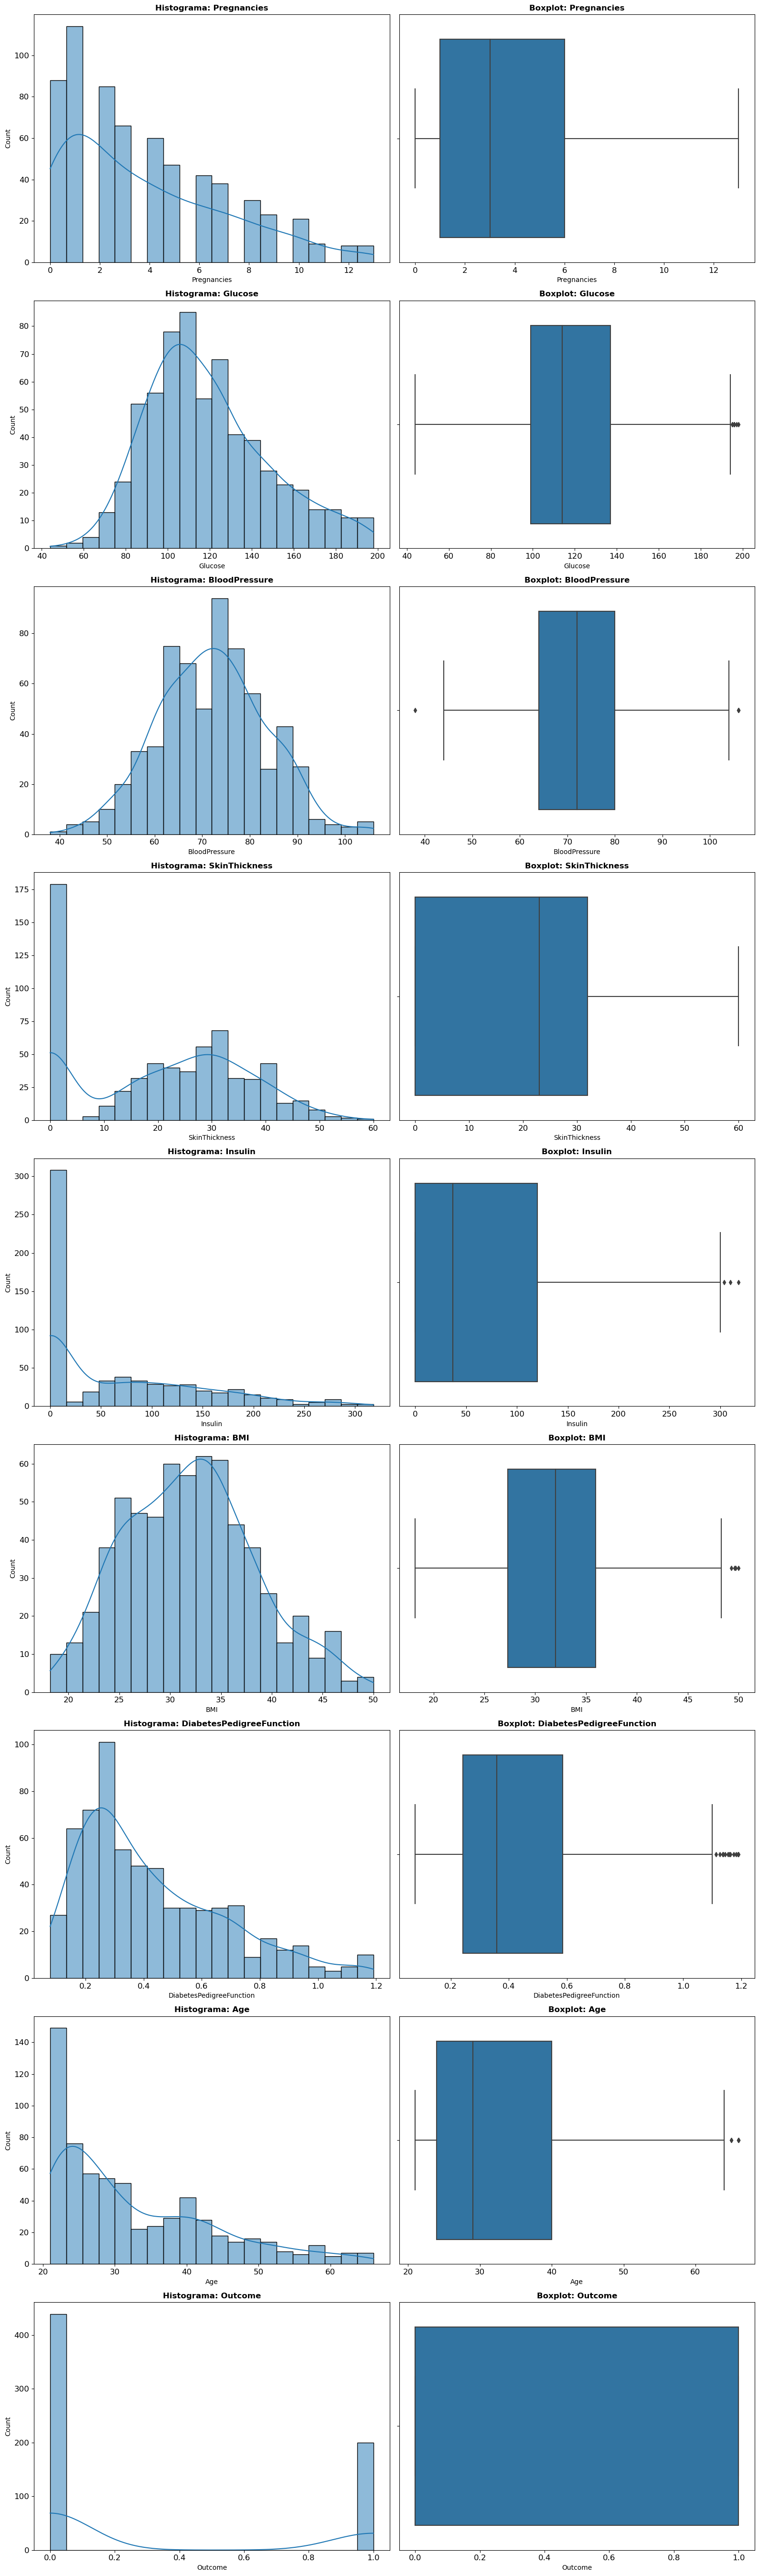

In [16]:
graficos_eda_numericos(df)

## 7.3 NULL ACTIONS

In [17]:
#NULLS
df.isnull().sum().sort_values(ascending=False)



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### TENTH CHECK POINT / WRITE CONCLUSIONS

* Delete colums, we havent nulls

# 8 FEATURE SCALLING

## 8.1 Normalization 

In [18]:
# Normalization 
from sklearn.preprocessing import StandardScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = df.index, columns = num_variables)
total_data_norm['Outcome'] = df['Outcome']
total_data_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,0
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,0
5,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,0


In [19]:
"""from sklearn.preprocessing import MinMaxScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

scaler = MinMaxScaler()

scal_features = scaler.fit_transform(df[num_variables])

df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)

df_scal["Outcome"] = df["Outcome"]

df_scal.head(15)"""

'from sklearn.preprocessing import MinMaxScaler\n\nnum_variables = [\'Pregnancies\', \'Glucose\', \'BloodPressure\', \'SkinThickness\', \'Insulin\', \'BMI\', \'DiabetesPedigreeFunction\', \'Age\', \'Outcome\']\n\nscaler = MinMaxScaler()\n\nscal_features = scaler.fit_transform(df[num_variables])\n\ndf_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)\n\ndf_scal["Outcome"] = df["Outcome"]\n\ndf_scal.head(15)'

## 8.2 FEATURE SELECTION

In [20]:
# Split DataSet and Select Best Features
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('Outcome', axis = 1)
y = total_data_norm['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,-0.860651,1.025669,-0.363366,-0.420877,-0.319735,0.838587
1,-1.167546,0.716808,-0.627921,1.647895,0.007271,-0.787139
2,0.366929,0.099087,1.223963,0.419076,-0.555019,0.025724
3,1.901405,1.437483,-0.363366,-1.011955,-0.411455,1.290178
4,-0.246861,1.059987,0.342113,-1.711915,-0.886012,0.386997


In [21]:
X_train_sel['Outcome'] = list(y_train)
X_test_sel['Outcome'] = list(y_test)
X_train_sel.to_csv(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\TRAIN.csv', index=False)
X_test_sel.to_csv(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\TEST.csv', index=False)

MACHINE LEARNING. 

SELEC THE BEST METODH: I SELEC: TREE ALGORITM

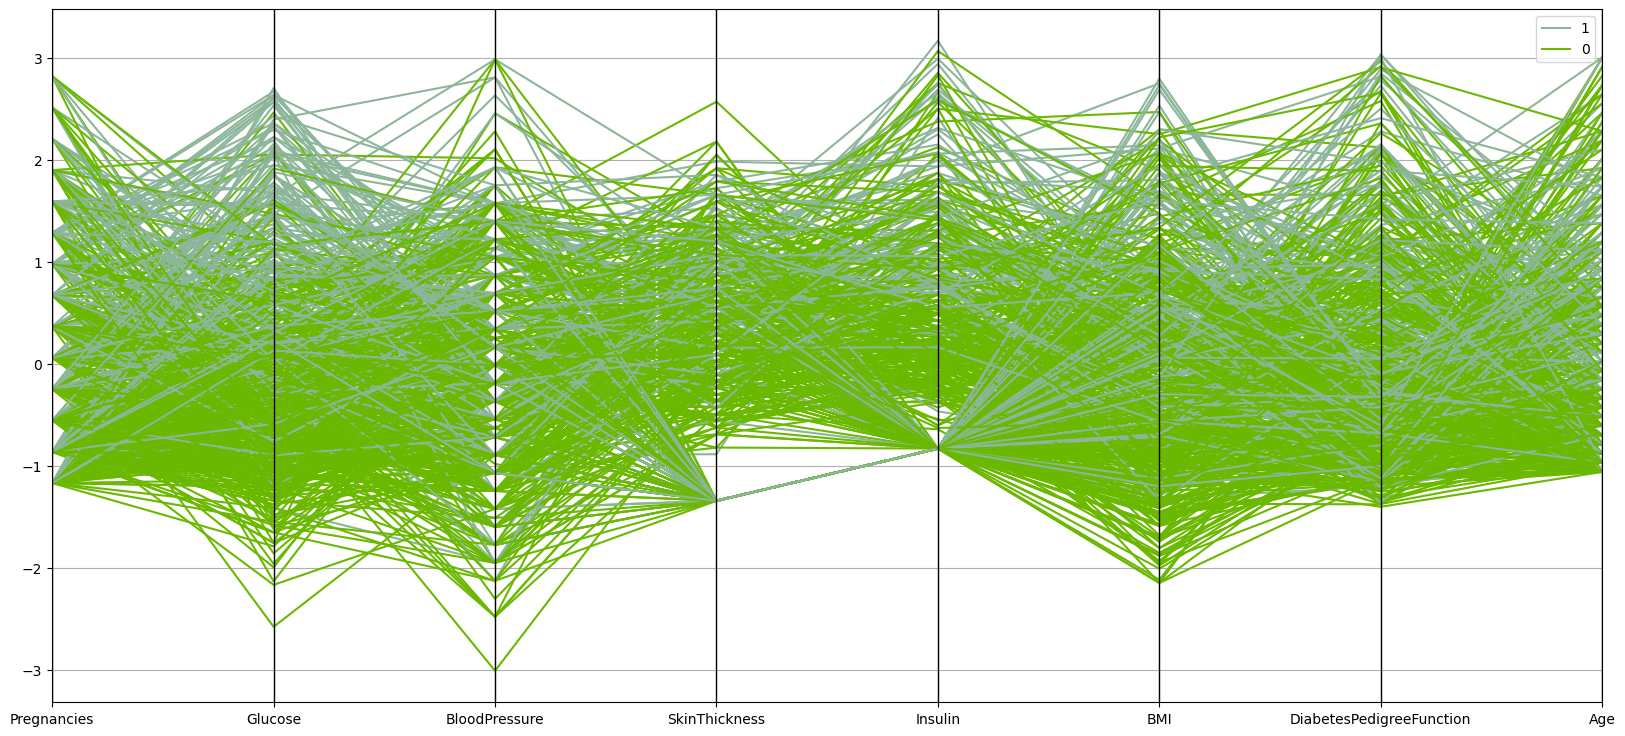

In [22]:
# Plot Parallel Coordinates
total_data = X
total_data['Outcome'] = y

plt.figure(figsize=(20, 9))
pd.plotting.parallel_coordinates(total_data, 'Outcome')
plt.show()

## 9 DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pickle import dump

# Load training and test data
train_data = pd.read_csv(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\TRAIN.csv')
test_data = pd.read_csv(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\TEST.csv')

# Separate characteristics and target variable in training data.
X_train = train_data.drop(columns=['Outcome'])  # Features
y_train = train_data['Outcome']  # Target variable

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
X_test = test_data.drop(columns=['Outcome'])  # Features
y_test = test_data['Outcome']  # Target variable
predictions = model.predict(X_test)

# Calculating model accuracy on test data
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo:", accuracy)

# Save model sav
dump(model, open(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\modeltree.sav', "wb"))

Precisión del modelo: 0.7578125


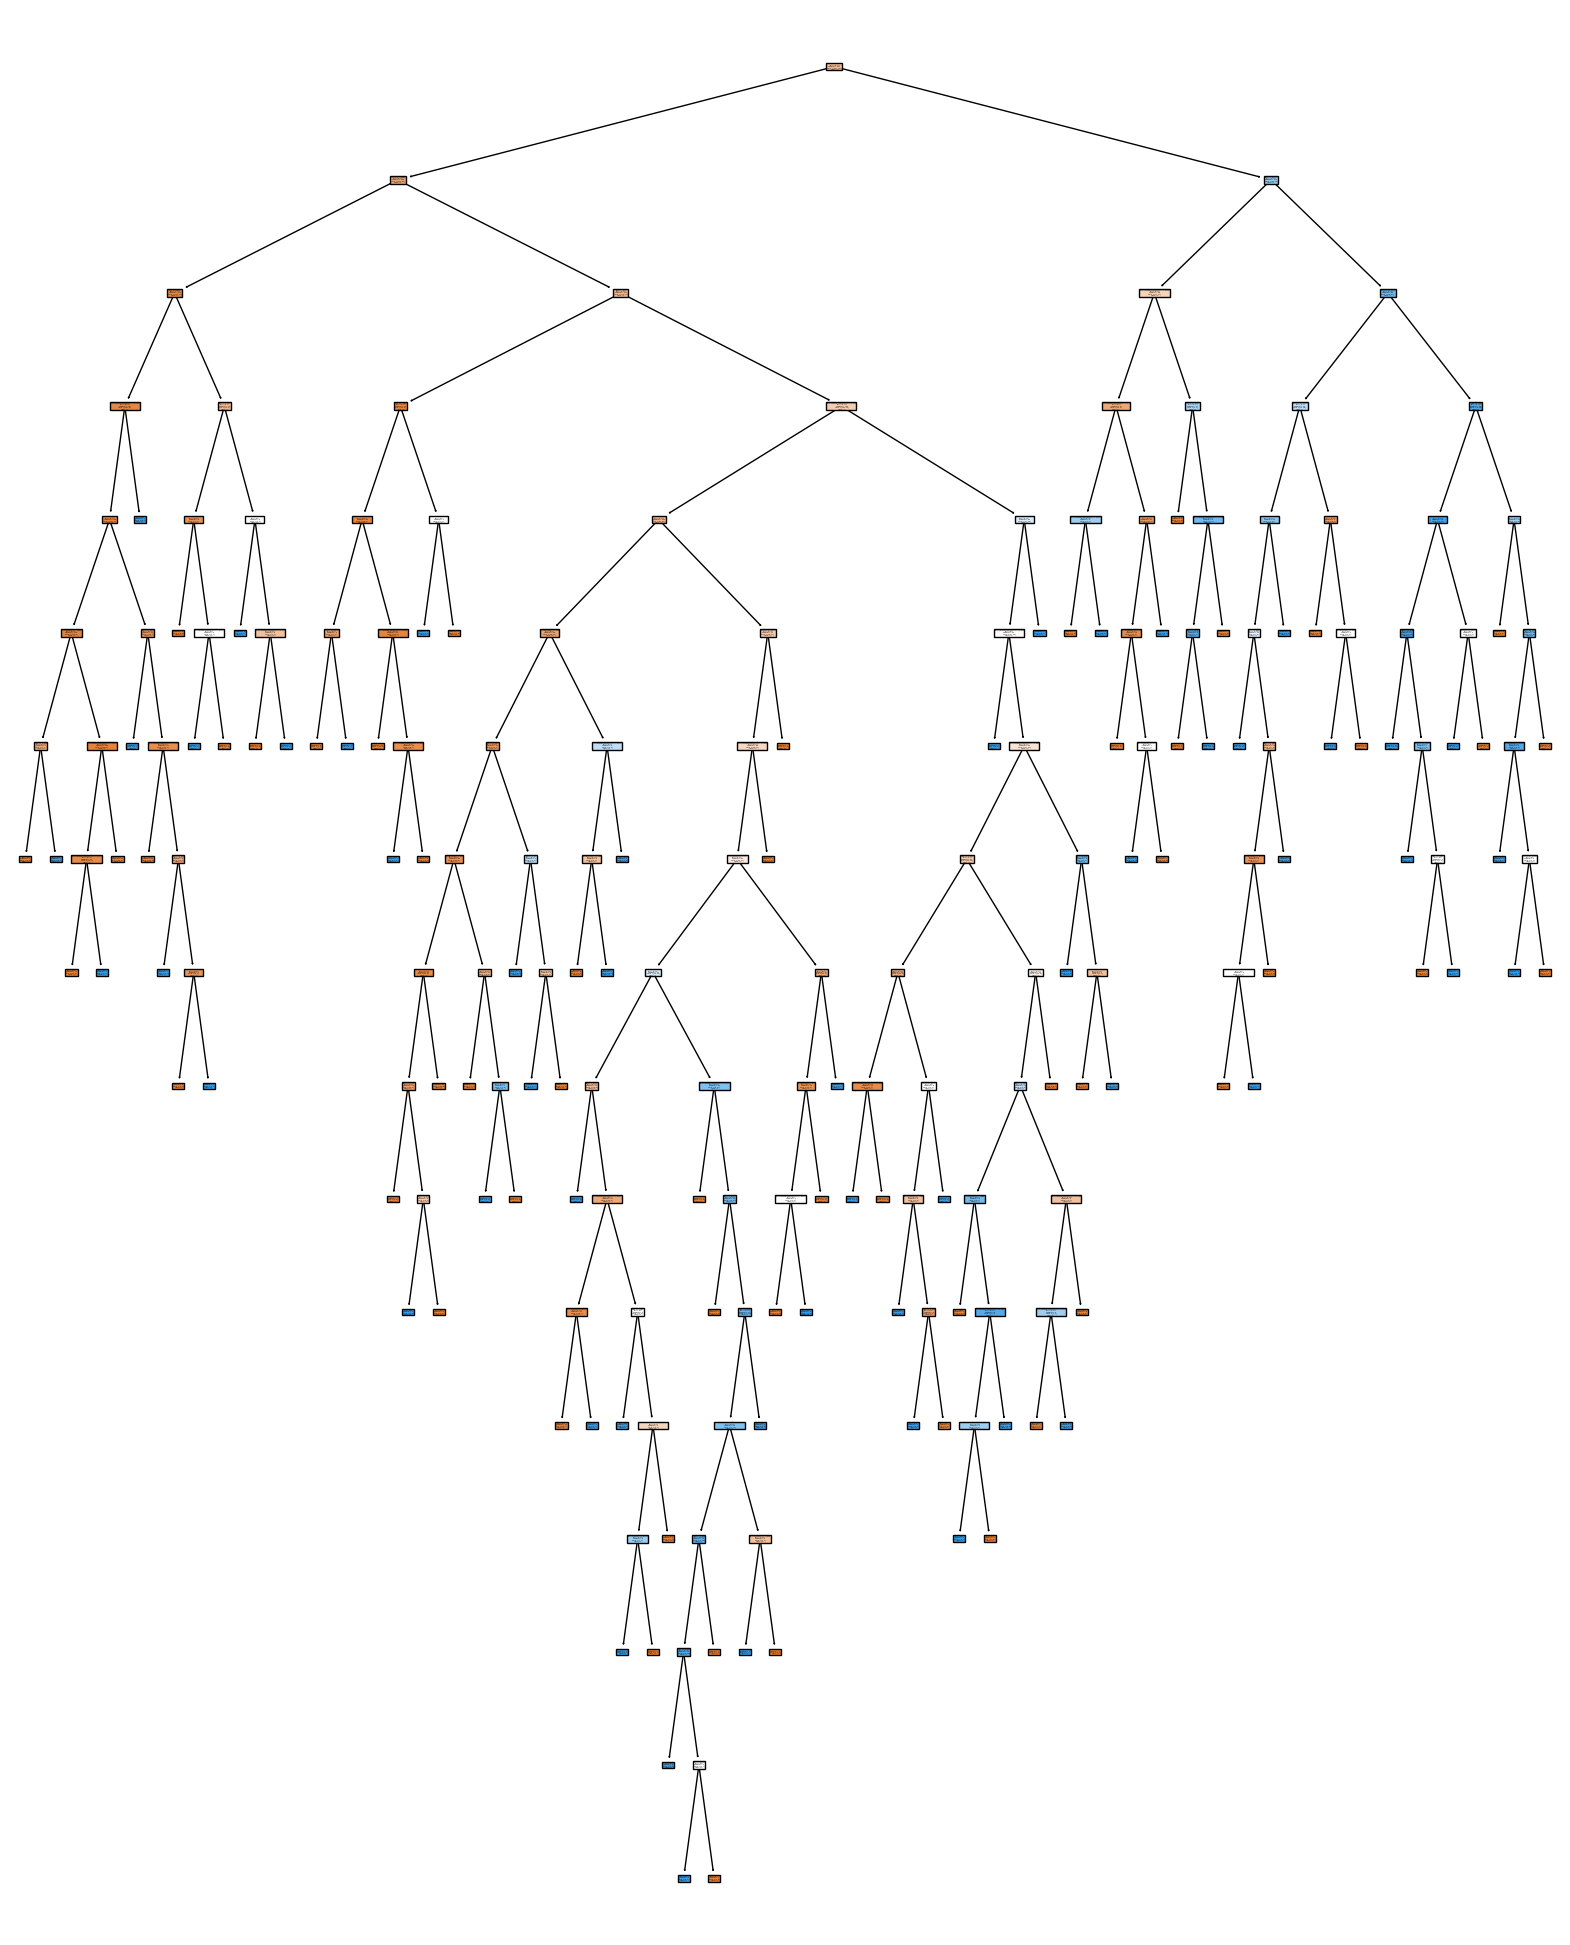

<Figure size 640x480 with 0 Axes>

In [27]:
#plot tree
from sklearn import tree

fig = plt.figure(figsize=(20,25))

tree.plot_tree(model,
               feature_names = list(X_train.columns),
               class_names = ["0", "1"],
               filled = True)

plt.show()
plt.savefig(r'G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\19 ARBOL\arbol.png')

## 10 RANDOM FOREST

### 10.1 RANDOM FOREST CLASSIFIER 

In [37]:
# Start by Random Forest Optimization
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### 10.2 PREDICT TEST

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## 10.3 ACCURACY 

In [40]:
from sklearn.metrics import accuracy_score

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 0.8046875


### 10.4 GRIDSEACH / HIPPERPARAMETERS

In [49]:
# Import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#  1: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  2: Define the grid of hyperparameters for search
hyperparams = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# 3: Create the base model (RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# 4: Performing hyperparameter search using GridSearchCV
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)
grid.fit(X_train, y_train)

# 5: Print the best hyperparameters found
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### 10.5 RETRAIN MODEL WITH HYPERPARAMETERS.

In [54]:
# Retrain the Model with Hyperparameters
model_grid = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

print(f'The Accuracy is: {accuracy_score(y_test, y_pred)}')

The Accuracy is: 1.0


### CONCLUSION:

The models is perfect: Accuracy 1.0